# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60 points**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final report.

### Let us start by importing the required libraries

In [2]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to extract datetime features
import datetime as dt

# Install the gdown library
!pip install gdown

# Get the Google Drive file ID from the URL
file_id = "1MGgDkIRCcZ5qlicxaQmYZ2qcNw4XsjJ-"
# Download the file from Google Drive
!gdown --id {file_id}

# Read the downloaded CSV file
data = pd.read_csv('foodhub_order.csv')

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1MGgDkIRCcZ5qlicxaQmYZ2qcNw4XsjJ-
To: /content/foodhub_order.csv
100% 124k/124k [00:00<00:00, 73.6MB/s]


### Understanding the structure of the data

In [4]:
# Read the data
df = pd.read_csv('foodhub_order.csv')
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [120]:
# Check the shape of the dataset
df.shape # Fill in the blank

(1898, 9)

**texto en negrita**### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [121]:
df = pd.read_csv('foodhub_order.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [122]:

# Checking for missing values in the data
df.isna().sum()


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [123]:

def print_min_avg_max(df,food_preparation_time):
    #This function prints the minimum, average (mean), and maximum values of the specified column in foodhub_order data set

    if food_preparation_time in df.columns:
        min_value = df[food_preparation_time].min()
        avg_value = df[food_preparation_time].mean()
        max_value = df[food_preparation_time].max()
        print(f"Column '{food_preparation_time}':")
        print(f"Minimum: {min_value}")
        print(f"Average: {avg_value}")
        print(f"Maximum: {max_value}")
    else:
        print(f"Column '{food_preparation_time}' does not exist in the DataFrame.")

# Read the CSV file into a DataFrame
df = pd.read_csv('foodhub_order.csv')

column_name = 'food_preparation_time'

# Print the minimum, average, and maximum of the specified column
print_min_avg_max(df, column_name)





Column 'food_preparation_time':
Minimum: 20
Average: 27.371970495258168
Maximum: 35


### **Question 5:** How many orders are not rated? [1 mark]





In [124]:
df['rating'].value_counts() # .value_counts() give the number of order and their rating, Not given means not rated which are 736 orders

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

> Agregar bloque entrecomillado

736 orders have no rate **given**










### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Order ID

In [6]:
# Complete the code to find out the number of unique Order ID
unique_orderID= df['order_id'].nunique()
print(f"Number of unique order ID's: {unique_orderID}")



Number of unique order ID's: 1898


#### Customer ID

In [126]:

 # Complete the code to find out the number of unique Customer ID
unique_customers = df['customer_id'].nunique()
print(f"Number of unique customers: {unique_customers}")

Number of unique customers: 1200


#### Restaurant name

In [127]:
# check unique Restaurant Name
unique_restaurants=df['restaurant_name'].nunique
print(f"Number of unique restaurants: {unique_customers}") # Complete the code to find out number of unique Restaurant Name

Number of unique restaurants: 1200


#### Cuisine type

In [128]:
# Check unique cuisine type
unique_cuisine_type=df['cuisine_type'].value_counts()
print(f"Number of unique cuisine type_{unique_cuisine_type}")  # Complete the code to find out the number of unique cuisine type

Number of unique cuisine type_cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64


<Axes: xlabel='cuisine_type', ylabel='count'>

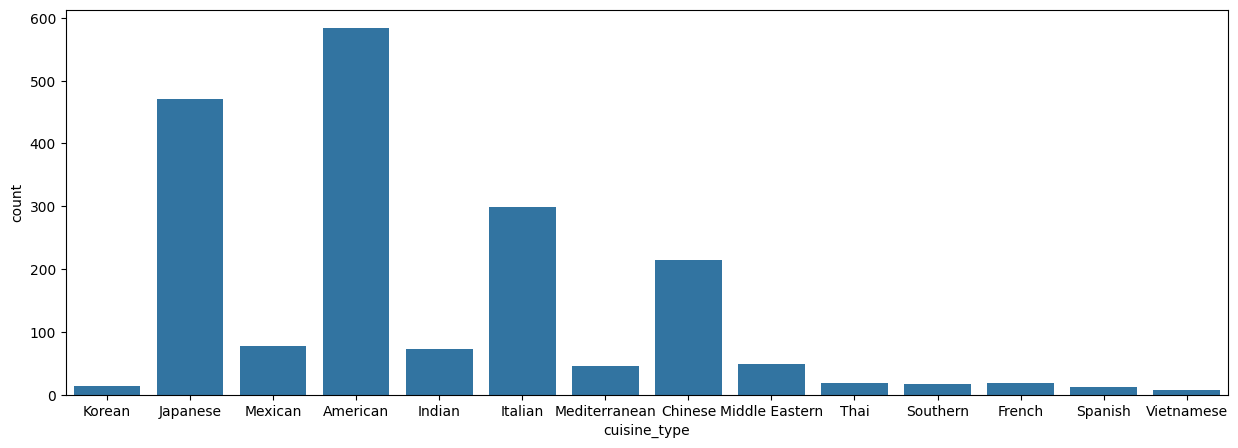

In [129]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') # Create a countplot for cuisine type

#### Cost of the order

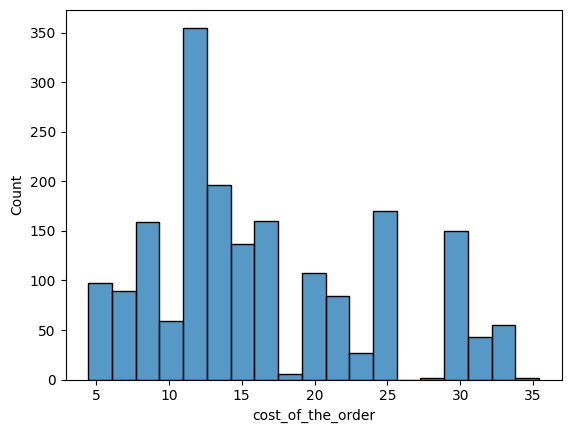

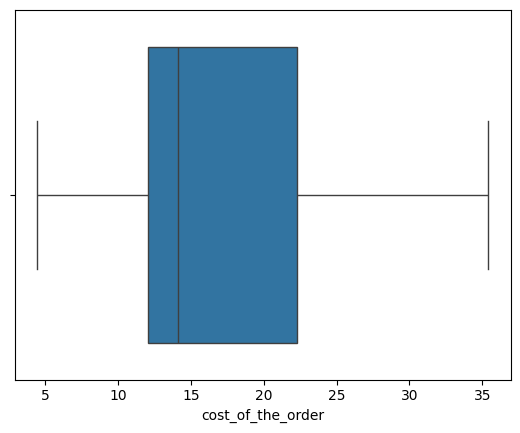

In [130]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

#### Day of the week

In [131]:
# # Check the unique values
unique_day_of_the_week=df['day_of_the_week'].value_counts()
print(f"Day of orders per day of the week:{unique_day_of_the_week}") # Complete the code to check unique values for the 'day_of_the_week' column

Day of orders per day of the week:day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64


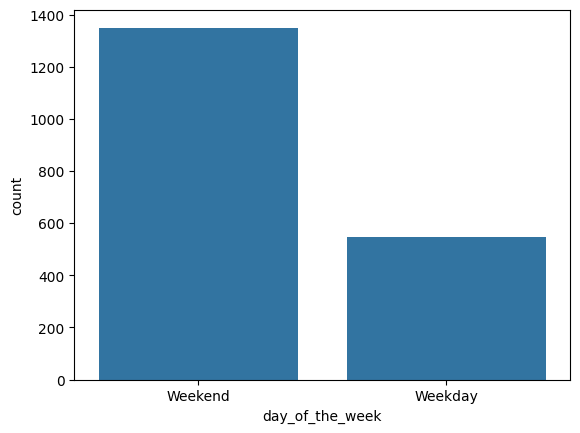

In [132]:
sns.countplot(data = df, x = 'day_of_the_week')
plt.show() # Complete the code to plot a bar graph for 'day_of_the_week' column

#### Rating

In [133]:
# Check the unique values
unique_rating= df['rating'].nunique # Complete the code to check unique values for the 'rating' column
print(f"Number of unique ratings: {unique_rating}")

Number of unique ratings: <bound method IndexOpsMixin.nunique of 0       Not given
1       Not given
2               5
3               3
4               4
          ...    
1893            5
1894            5
1895    Not given
1896            5
1897    Not given
Name: rating, Length: 1898, dtype: object>


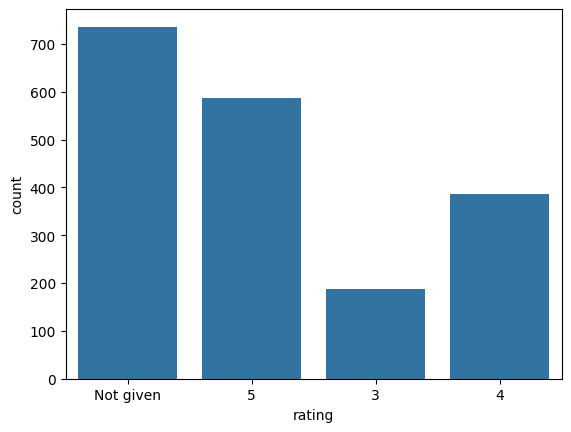

In [134]:
sns.countplot(data = df, x = 'rating')
plt.show() # Complete the code to plot bar graph for 'rating' column

#### Food Preparation time

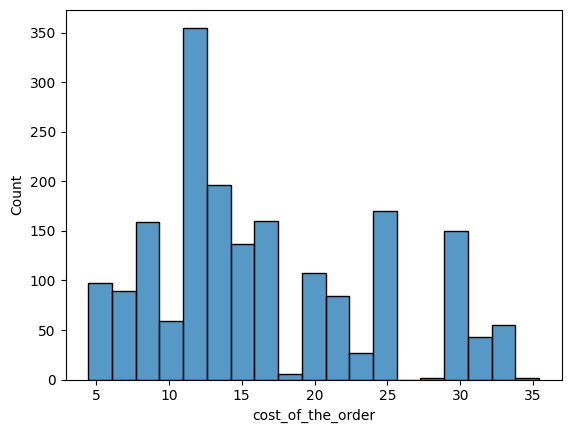

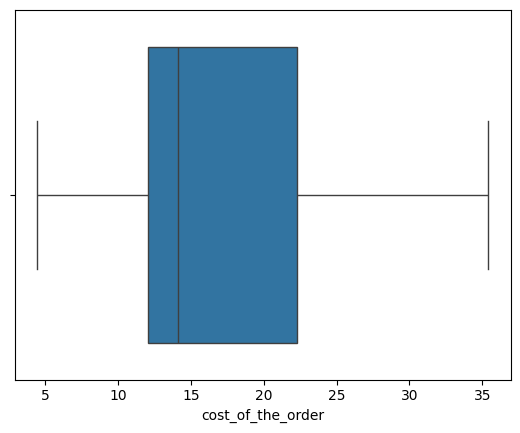

In [8]:
sns.histplot(data=df,x='cost_of_the_order') # Complete the code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') # Complete the code to plot the boxplot for the cost of order
plt.show()

#### Delivery time

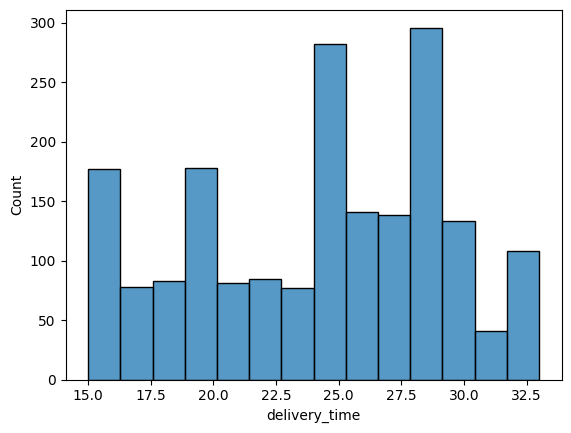

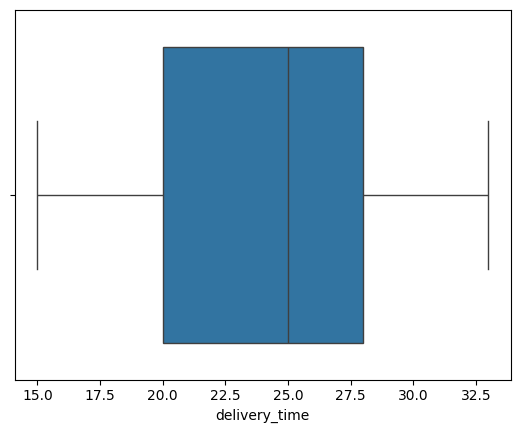

In [136]:
sns.histplot(data=df,x='delivery_time') # Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time')  # Complete the code to plot the boxplot for the delivery time
plt.show()

### **Question 7:** Which are the top 5 restaurants in terms of the number of

---

orders received? [1 mark]

---



In [137]:
# Get top 5 restaurants with highest number of orders
top5_restaurants=df['restaurant_name'].value_counts().head(5) # Complete the code
print(f"top5_restaurants:{top5_restaurants}")

top5_restaurants:restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [138]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head(1)  # Complete the code to check unique values for the cuisine type on weekend

cuisine_type
American    415
Name: count, dtype: int64

### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]

In [139]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] # Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### **Question 10:** What is the mean order delivery time? [1 mark]

1.   Elemento de la lista
2.   Elemento de la lista



In [140]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  # Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [141]:
# Get the counts of each customer_id
top3_customers=df['customer_id'].value_counts().head(3)
print(f"The top 3 most frequent customers are the following:{top3_customers}") # Write the appropriate column name to get the 5 most frequent customers

The top 3 most frequent customers are the following:customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

<ipython-input-142-d4845c8bfb45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')


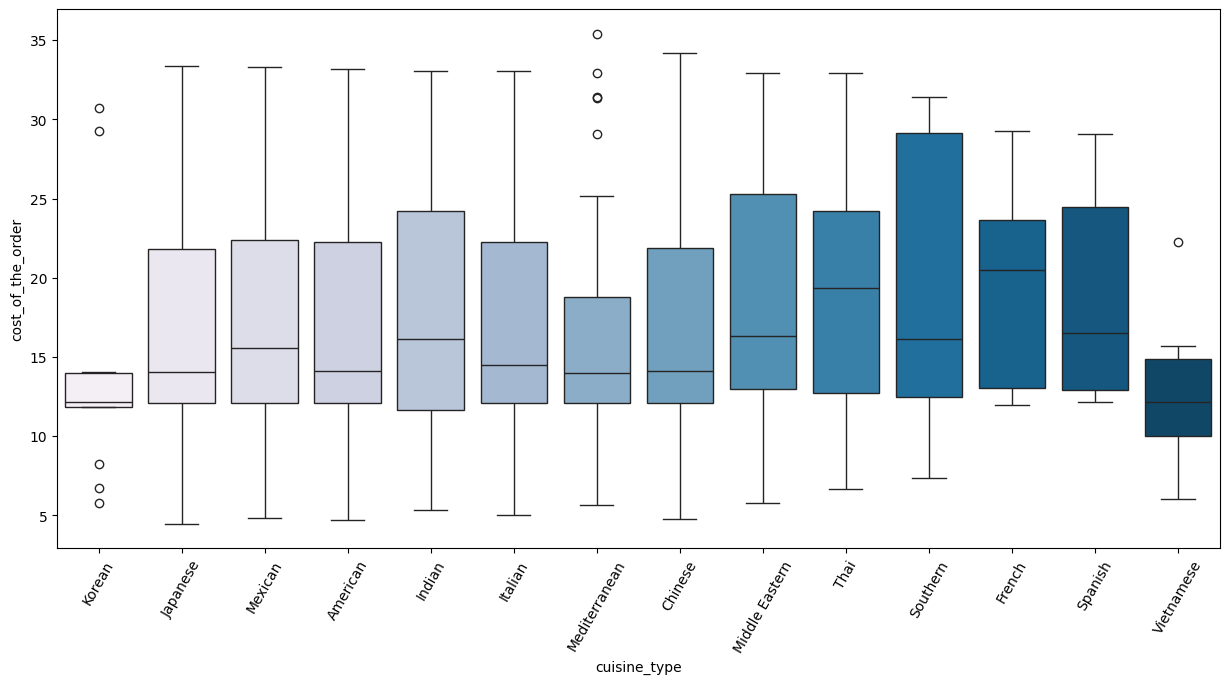

In [142]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Cuisine vs Food Preparation time

<ipython-input-143-3dc16d1fec51>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="food_preparation_time", y = "cuisine_type", data = df, palette = 'PuBu')  # Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot


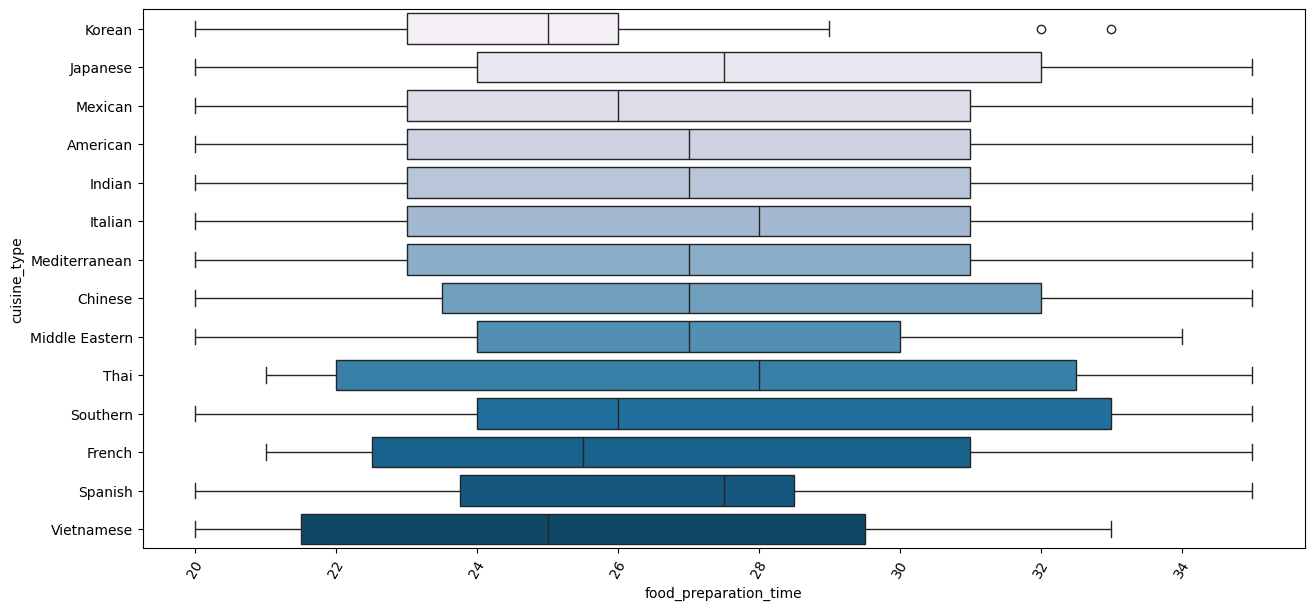

In [143]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x="food_preparation_time", y = "cuisine_type", data = df, palette = 'PuBu')  # Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

#### Day of the Week vs Delivery time

<ipython-input-144-8f2726d08e0e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="day_of_the_week",  y= "delivery_time", data = df, palette= "PuBu")


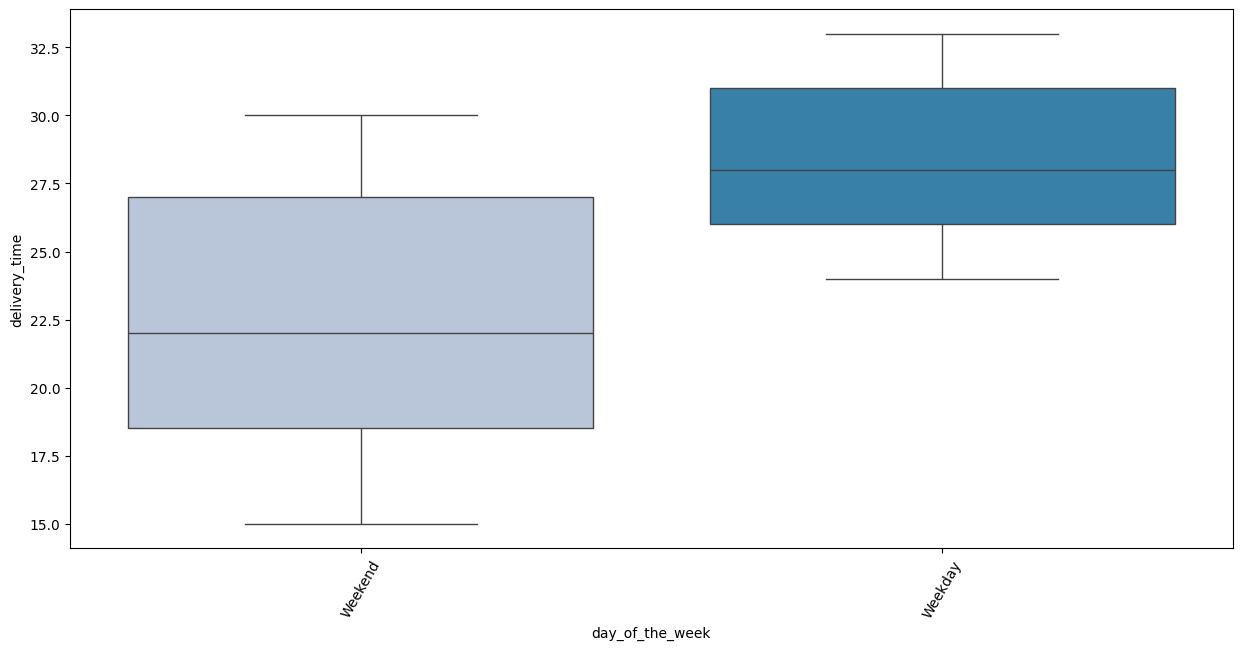

In [144]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x="day_of_the_week",  y= "delivery_time", data = df, palette= "PuBu")
plt.xticks(rotation= 60)  # Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [145]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

The Blue Ribbon franchise holds 3 positions in the top 14, specifically the 3rd, 4th, and 10th places, indicating a strong performance across its various locations and contributing significantly to the overall high income on the app. Similarly, the Redfarm franchise, with  locations on Broadway & Hudson, also shows a notable performance, suggesting that these specific restaurants are major contributors to its overall income. These observations highlight the strong performance of certain franchises, such as Blue Ribbon and Redfarm, in generating substantial income on the app. Not to forget Shake Shack is the top of the list with 3579.53 revenued generated.

#### Rating vs Delivery time

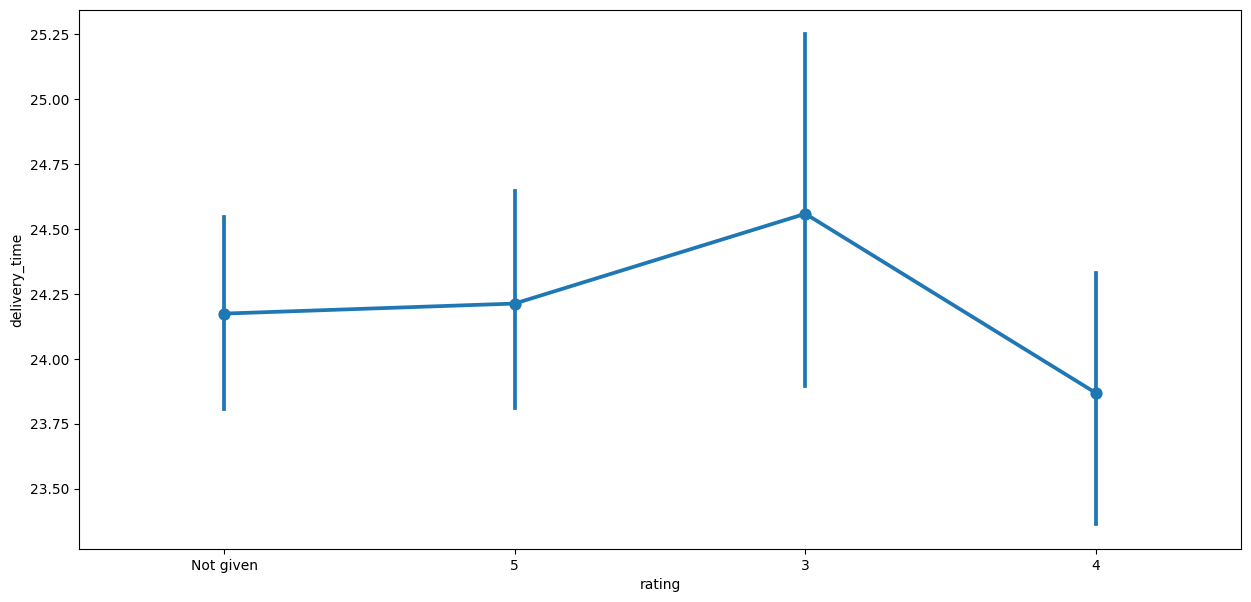

In [146]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Rating vs Food preparation time

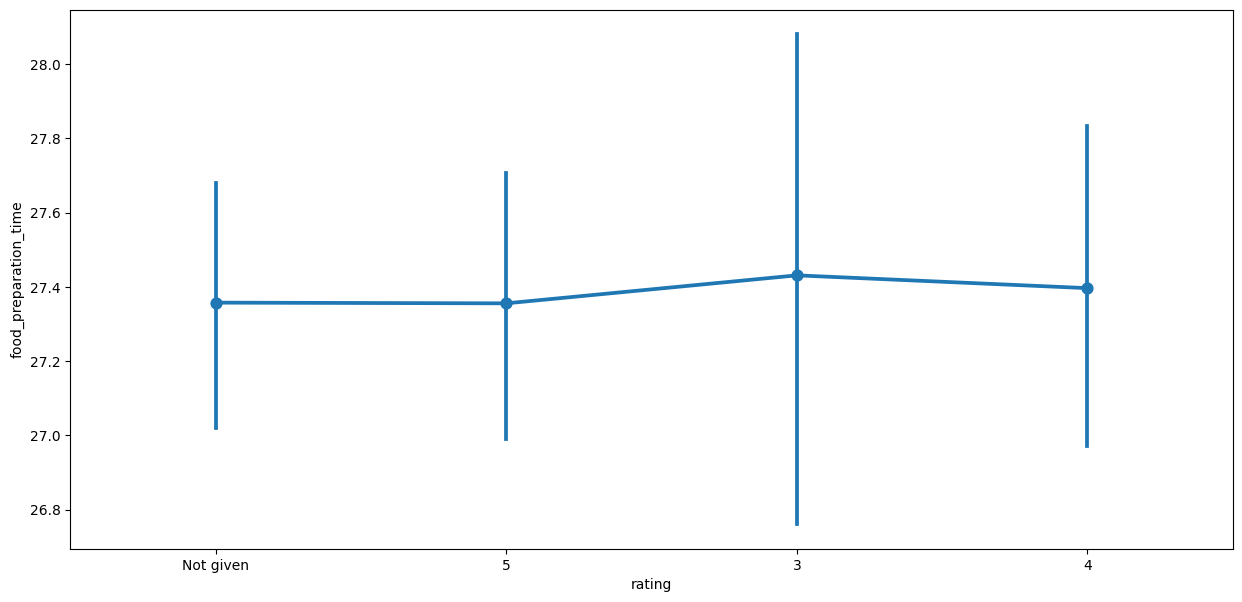

In [147]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y="food_preparation_time", data= df)  # Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

#### Rating vs Cost of the order

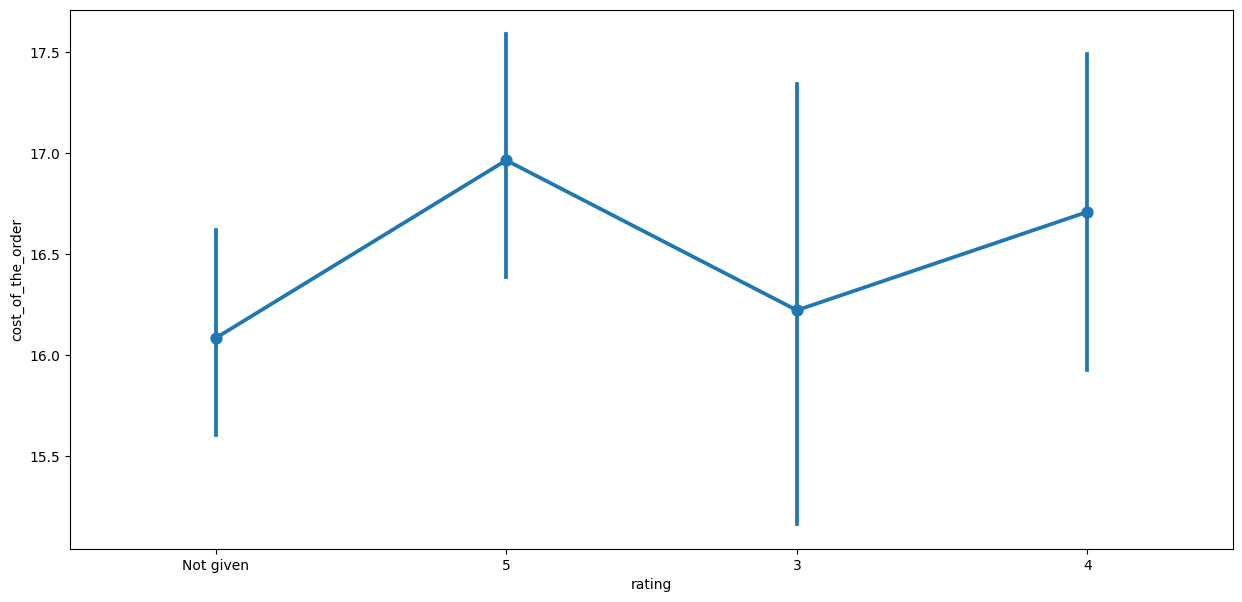

In [148]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y="cost_of_the_order", data= df)   # Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

#### Correlation among variables

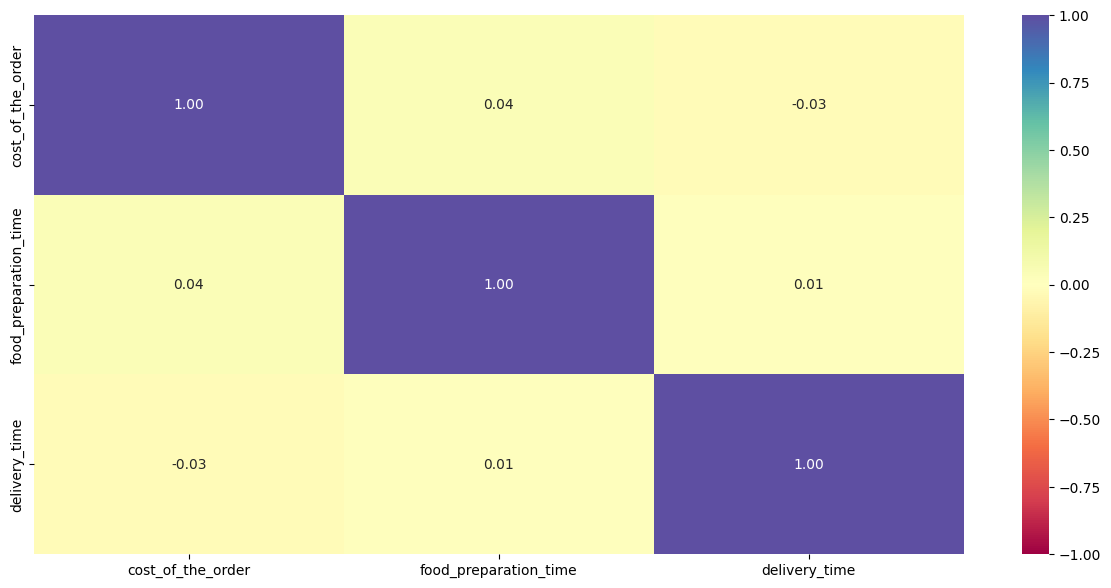

In [149]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [150]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [151]:

# Calculate the mean of the 'rating' column for each restaurant
df_rating_mean = df_rated.groupby('restaurant_name')['rating'].mean().reset_index()

# Calculate the count of ratings for each restaurant
df_rating_count = df_rated.groupby('restaurant_name')['rating'].count().reset_index()
df_rating_count.columns = ['restaurant_name', 'rating_count']

# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating_count'] > 50]['restaurant_name']

# Filter restaurants with average rating greater than 4
rest_names_mean4 = df_rating_mean[df_rating_mean['rating'] > 4]['restaurant_name']

# Combine both conditions
df_eligible_restaurants = df_rating_mean[
    df_rating_mean['restaurant_name'].isin(rest_names) &
    df_rating_mean['restaurant_name'].isin(rest_names_mean4)
]

# Print the eligible restaurants
print(df_eligible_restaurants['restaurant_name'])


16     Blue Ribbon Fried Chicken
17             Blue Ribbon Sushi
117                  Shake Shack
132            The Meatball Shop
Name: restaurant_name, dtype: object


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [152]:
# Function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

Revenue=df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) # Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [153]:
# Get the total revenue and print it
total_rev = df['Revenue'].sum() # Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]


In [154]:
df = pd.DataFrame(data)
# Calculate total delivery time and add a new column to the DataFrame to store it
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
# Convert rating column from object to integer
df['total_time'] = df['total_time'].astype(int)
# Calculate the percentage of orders that have more than 60 minutes of total delivery time
percentage_of_orders_more_than_60_min = len(df[df['total_time'] > 60]) / len(df) * 100
print(f"The percentage of orders that have more than 60 minutes of total delivery time is: {percentage_of_orders_more_than_60_min:.2f}%")



The percentage of orders that have more than 60 minutes of total delivery time is: 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [155]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

# Write the code below to get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')






The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
 *

### Recommendations:

*  

---